# Plot of complex L1-norm solution

This notebook plots the validation test for multiple inversions and the solution which produces the smallest goal function value for the L1-norm code.

In [1]:
import numpy as np
import matplotlib as mpb
import cPickle as pickle

# show the figures in windows

# show all the matplotlib backends 
#mpb.rcsetup.all_backends

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

In [2]:
# importing my functions
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
# importing the pickle file of results
result_path = 'l2-tfa-inversion/multiple-54475/'

with open(result_path+'inversion.pickle') as w:
        inversion = pickle.load(w)
        
with open('model.pickle') as w:
        model = pickle.load(w)

In [4]:
inversion['regularization']

array([1.e-05, 1.e-04, 0.e+00, 0.e+00, 1.e-04, 1.e-07, 1.e-05])

In [5]:
# directory to save the figures
filename = '../../manuscript/figures/small-l2-solution.png'
#filename = ''

In [6]:
z0 = inversion['z0']
intensity = inversion['intensity']
z0_plot, int_plot = np.meshgrid(z0, intensity)
z0_plot = z0_plot.ravel()
int_plot = int_plot.ravel()
n = z0.size
m = intensity.size
N = inversion['x'].size

In [7]:
# building the matrix of the goal function
gamma_matrix = mfun.goal_matrix(n, m, inversion['results'])

In [8]:
np.min(gamma_matrix)

905.3268926324891

In [9]:
np.argmin(gamma_matrix)

23

In [10]:
# parameters for the figure
vmin = int(np.min(gamma_matrix))
vmax = 5000.
solutions = [[3,5]]
norm = 2
figsize = (4.33, 4.33)
inset_position = (0.4, 0.9)
dpi = 1200
truevalues = [3,2]
angles= [10, 50, 10, 30]
area = [-2.,2.5,-2.5,2.]
model = model['prisms']
inter = True

# Figures

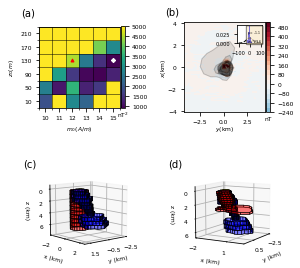

In [11]:
mfun.plot_synthetic_solution(
    inversion['x'], inversion['y'],
    inversion['z'], inversion['results'][23][3],
    inversion['results'][23][2][-1],
    inversion['results'][23][2][0],
    z0, intensity, gamma_matrix, vmin,
    vmax, solutions, norm, figsize,
    inset_position, dpi,
    truevalues, angles, area, model,
    filename, inter
)